In [1]:
import os

import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

import librosa
import librosa.display

from PIL import Image

In [142]:
filename = "./audio/test.mp3"
print('File: {}'.format(filename))

x, sr = librosa.load(filename, sr=None, mono=True)
print('Duration: {:.2f}s, {} samples, {} SR'.format(x.shape[-1] / sr, x.size, sr))

start, end = 0, 432*512-1
ipd.Audio(data=x[start:end], rate=sr)

File: ./audio/test.mp3
Duration: 29.98s, 1321967 samples, 44100 SR


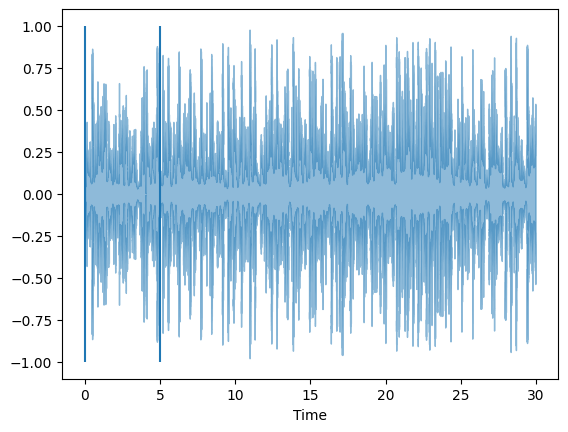

In [143]:
librosa.display.waveshow(x, sr=sr, alpha=0.5)
plt.vlines([start/sr, end/sr], -1, 1)

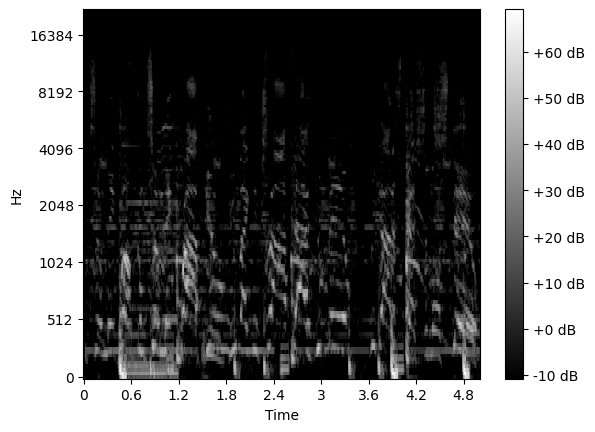

In [144]:
stft = np.abs(librosa.stft(x[start:end], n_fft=2048, hop_length=512))
mel = librosa.feature.melspectrogram(sr=sr, S=stft**2, n_mels=128)
log_mel = librosa.amplitude_to_db(mel)

fig, ax = plt.subplots()
img = librosa.display.specshow(log_mel, sr=sr, x_axis='time', y_axis='mel', cmap='gray')
# img = librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='linear', cmap='gray')
cb = fig.colorbar(img, ax=ax, format='%+2.0f dB')
# plt.ylim([20, 2000])
cb

In [145]:
log_mel.shape

(128, 432)

In [118]:
# Remove axes and labels
cb.remove()
ax.axis('off')
# Save the figure to an image file
fig.savefig('img/test.png', bbox_inches='tight', pad_inches=0)

In [119]:
# Open the PNG file
png_image = Image.open('img/test.png')

# Convert the image to grayscale
gray_image = png_image.convert('RGB')

# Save the grayscale image as BMP
gray_image.save('img/test.bmp', 'BMP')

In [114]:
mel_repr = librosa.db_to_amplitude(log_mel)
y = librosa.feature.inverse.mel_to_audio(mel_repr, sr=sr)
ipd.Audio(data=y, rate=sr)

In [ ]:
def audio2img(filepath: str, outpath: str):
    outfolder = os.path.dirname(outpath)
    if not os.path.exists(outfolder):
        os.makedirs(outfolder, exist_ok=True)

    # TODO

In [2]:
def audio2mel(filepath: str):
    x, sr = librosa.load(filepath, sr=None, mono=True)
    start, end = 0, 432*512-1

    stft = np.abs(librosa.stft(x[start:end], n_fft=2048, hop_length=512))
    mel = librosa.feature.melspectrogram(sr=sr, S=stft**2, n_mels=128)
    log_mel = librosa.amplitude_to_db(mel)

    return log_mel, sr

In [3]:
all_mels = {}
DIRECTORY = './fma_small'

for root, dirs, files in os.walk(DIRECTORY):
    relative_path = ""
    for file in files:
        if file.lower().endswith('.mp3'):  # Check if the file is an MP3
            # Get the relative path
            relative_path = os.path.relpath(os.path.join(root, file), DIRECTORY)
            filepath = os.path.join(DIRECTORY, relative_path)

            # Call the function on the MP3 file
            try:
                mel, sr = audio2mel(filepath)
                if mel.shape == (128, 432):
                    all_mels[relative_path + f'_{sr}'] = mel
                else:
                    print("Skipping shape {}".format(mel.shape))
            except Exception as e:
                print(e)
                pass

            # break     # uncomment to run faster
    if len(relative_path) > 0: print("Done processing {}".format(relative_path.split('\\')[0]))

Done processing 000
Done processing 001
Done processing 002
Done processing 003
Done processing 004
Done processing 005
Done processing 006
Done processing 007
Done processing 008
Done processing 009
Done processing 010
Done processing 011
Done processing 012
Done processing 013
Done processing 014
Done processing 015
Done processing 016
Done processing 017
Done processing 018
Done processing 019
Done processing 020
Done processing 021
Done processing 022
Done processing 023
Done processing 024
Done processing 025
Done processing 026
Done processing 027
Done processing 028
Done processing 029
Done processing 030
Done processing 031
Done processing 032
Done processing 033
Done processing 034
Done processing 035
Done processing 036
Done processing 037
Done processing 038
Done processing 039
Done processing 040
Done processing 041
Done processing 042
Done processing 043
Done processing 044
Done processing 045
Done processing 046
Done processing 047
Done processing 048
Done processing 049


C:\Users\DDA\AppData\Local\Temp\ipykernel_25296\2480223425.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load(filepath, sr=None, mono=True)
c:\Users\DDA\Desktop\spring2025\COMP5421\comp5421-img-to-spec\.venv\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Skipping shape (128, 139)
Skipping shape (128, 44)
Skipping shape (128, 132)
Done processing 098

Done processing 099
Done processing 100
Done processing 101
Done processing 102
Done processing 103
Done processing 104
Done processing 105
Done processing 106
Done processing 107

Done processing 108
Done processing 109
Done processing 110
Done processing 111
Done processing 112
Done processing 113
Done processing 114
Done processing 115
Done processing 116
Done processing 117
Done processing 118
Done processing 119
Done processing 120
Done processing 121
Done processing 122
Done processing 123
Done processing 124
Done processing 125
Done processing 126
Done processing 127
Done processing 128
Done processing 129
Done processing 130
Done processing 131
Done processing 132

Done processing 133
Done processing 134
Done processing 135
Done processing 136
Done processing 137
Done processing 138
Done processing 139
Done processing 140
Done processing 141
Done processing 142
Done processing 143


In [4]:
np.savez_compressed('./output/fma_small_mel.npz', **all_mels)

In [5]:
all_mels_repr = np.load('./output/fma_small_mel.npz')

default_shape = all_mels_repr[all_mels_repr.files[0]].shape
print(default_shape)
for file in all_mels_repr.files:
    if all_mels_repr[file].shape != default_shape:
        print("Inconsistency found: {}, {}".format(file, all_mels_repr[file].shape))

(128, 432)


In [8]:
file = all_mels_repr.files[0]
sr = float(file.split("_")[1])
print(file)
print(sr)
mel_repr = librosa.db_to_amplitude(all_mels_repr[file])
y = librosa.feature.inverse.mel_to_audio(mel_repr, sr=sr, n_iter=128)
ipd.Audio(data=y, rate=sr)

000/000002.mp3_44100
44100.0
